In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [35]:
salary=pd.read_csv('salary.csv')

In [36]:
salary

,salary,experience,education,management
0,13876,1,Bachelor,Y
1,11608,1,Ph.D,N
2,18701,1,Ph.D,Y
3,11283,1,Master,N
4,11767,1,Ph.D,N
5,20872,2,Master,Y
6,11772,2,Master,N
7,10535,2,Bachelor,N
8,12195,2,Ph.D,N
9,12313,3,Master,N


In [37]:
salary.describe()

,salary,experience
count,46.000000,46.000000
mean,17270.195652,7.500000
std,4716.631513,5.171503
min,10535.000000,1.000000
25%,13320.750000,3.000000
50%,16436.000000,6.000000
75%,20719.750000,11.000000
max,27837.000000,20.000000


In [38]:
salary.dtypes

salary         int64
experience     int64
education     object
management    object
dtype: object

In [39]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
list1=['salary','experience','education','management']
for val in list1:
    salary[val]=le.fit_transform(salary[val].astype(str))

In [40]:
salary

,salary,experience,education,management
0,15,0,0,1
1,3,0,2,0
2,28,0,2,1
3,1,0,1,0
4,4,0,2,0
5,34,9,1,1
6,5,9,1,0
7,0,9,0,0
8,6,9,2,0
9,7,11,1,0


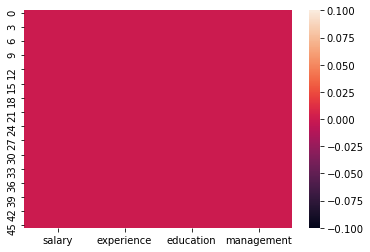

In [41]:
sns.heatmap(salary.isnull())

In [42]:
salary.isnull().sum()

salary        0
experience    0
education     0
management    0
dtype: int64

In [43]:
salary.corr()

,salary,experience,education,management
salary,1.000000,-0.080479,0.229857,0.730005
experience,-0.080479,1.000000,-0.131927,0.027792
education,0.229857,-0.131927,1.000000,0.196684
management,0.730005,0.027792,0.196684,1.000000


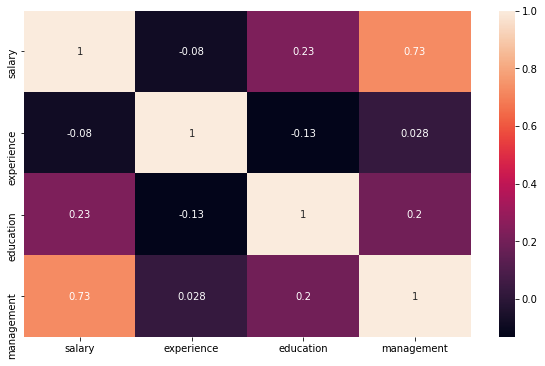

In [44]:
plt.figure(figsize=(10,6))
sns.heatmap(salary.corr(),annot=True)

In [45]:
salary.skew()

salary        0.000000
experience   -0.189173
education     0.038033
management    0.272071
dtype: float64

In [46]:
from scipy.stats import zscore
z_score=abs(zscore(salary))
print(salary.shape)
sal=salary.loc[(z_score<3).all(axis=1)]
print(sal.shape)

(46, 4)
(46, 4)


In [47]:
sal

,salary,experience,education,management
0,15,0,0,1
1,3,0,2,0
2,28,0,2,1
3,1,0,1,0
4,4,0,2,0
5,34,9,1,1
6,5,9,1,0
7,0,9,0,0
8,6,9,2,0
9,7,11,1,0


In [48]:
x=sal.iloc[:,0:-1]

In [49]:
x

,salary,experience,education
0,15,0,0
1,3,0,2
2,28,0,2
3,1,0,1
4,4,0,2
5,34,9,1
6,5,9,1
7,0,9,0
8,6,9,2
9,7,11,1


In [50]:
x.shape

(46, 3)

In [51]:
y=sal.iloc[:,-1]

In [52]:
y

0     1
1     0
2     1
3     0
4     0
5     1
6     0
7     0
8     0
9     0
10    1
11    1
12    1
13    0
14    1
15    0
16    0
17    0
18    0
19    1
20    0
21    1
22    0
23    1
24    1
25    0
26    1
27    1
28    0
29    0
30    0
31    1
32    1
33    1
34    0
35    0
36    1
37    0
38    1
39    0
40    1
41    1
42    0
43    0
44    0
45    0
Name: management, dtype: int32

In [53]:
y.shape

(46,)

In [54]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=42)

In [55]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
lr.score(x_train,y_train)
pred=lr.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.8181818181818182
[[6 2]
 [0 3]]
              precision    recall  f1-score   support

           0       1.00      0.75      0.86         8
           1       0.60      1.00      0.75         3

    accuracy                           0.82        11
   macro avg       0.80      0.88      0.80        11
weighted avg       0.89      0.82      0.83        11



In [56]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
predknn=knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

1.0
[[8 0]
 [0 3]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         3

    accuracy                           1.00        11
   macro avg       1.00      1.00      1.00        11
weighted avg       1.00      1.00      1.00        11



In [57]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
gnb.score(x_train,y_train)
predgnb=gnb.predict(x_test)
print(accuracy_score(y_test,predgnb))
print(confusion_matrix(y_test,predgnb))
print(classification_report(y_test,predgnb))

0.7272727272727273
[[6 2]
 [1 2]]
              precision    recall  f1-score   support

           0       0.86      0.75      0.80         8
           1       0.50      0.67      0.57         3

    accuracy                           0.73        11
   macro avg       0.68      0.71      0.69        11
weighted avg       0.76      0.73      0.74        11



In [58]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.9090909090909091
[[7 1]
 [0 3]]
              precision    recall  f1-score   support

           0       1.00      0.88      0.93         8
           1       0.75      1.00      0.86         3

    accuracy                           0.91        11
   macro avg       0.88      0.94      0.90        11
weighted avg       0.93      0.91      0.91        11



In [59]:
from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier()
ad.fit(x_train,y_train)
ad.score(x_train,y_train)
predad=ad.predict(x_test)
print(accuracy_score(y_test,predad))
print(confusion_matrix(y_test,predad))
print(classification_report(y_test,predad))

0.9090909090909091
[[7 1]
 [0 3]]
              precision    recall  f1-score   support

           0       1.00      0.88      0.93         8
           1       0.75      1.00      0.86         3

    accuracy                           0.91        11
   macro avg       0.88      0.94      0.90        11
weighted avg       0.93      0.91      0.91        11



In [60]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

1.0
[[8 0]
 [0 3]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         3

    accuracy                           1.00        11
   macro avg       1.00      1.00      1.00        11
weighted avg       1.00      1.00      1.00        11



In [61]:
#AdaBoostClassifier is the best model among all models

import joblib
joblib.dump(ad,'salary.pkl')

['salary.pkl']